# 降维实践-学生版

## 加载sklearn的wine数据，分别实现主成分分析(PCA)和线性判别分析(LDA）

In [1]:
from sklearn import datasets
data=datasets.load_wine()
X=data['data']
y=data['target']

In [2]:
X.shape

(178, 13)

In [3]:
len(y)

178

In [6]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from matplotlib.colors import ListedColormap
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

### 主成分分析(PCA)

In [4]:
# 切分数据集
from sklearn import model_selection
X_train, X_test, y_train, y_test = model_selection.train_test_split(X,y, test_size=0.2,random_state=5)

In [8]:
# standardize the feature 标准化单位方差
sc = StandardScaler()
x_train_std = sc.fit_transform(X_train)
x_test_std = sc.fit_transform(X_test)

In [18]:
from sklearn import preprocessing 
from sklearn.decomposition import PCA
model = PCA( n_components=0.70)
model.fit(x_train_std)

PCA(n_components=0.7)

In [19]:
print('奇异值:',model.singular_values_) #奇异值

奇异值: [25.83766353 18.79587033 14.55140844 11.7218203 ]


In [20]:
print('方差占比:',model.explained_variance_ratio_) #方差占比

方差占比: [0.3616386  0.19137852 0.11470395 0.07443178]


In [21]:
print('特征向量:',model.components_)

特征向量: [[ 1.28275638e-01 -2.52890451e-01 -3.04548244e-02 -2.27878127e-01
   1.30490797e-01  3.87550201e-01  4.22413817e-01 -3.02978527e-01
   3.15364053e-01 -1.13343295e-01  3.13615106e-01  3.76247930e-01
   2.77606356e-01]
 [-4.97926435e-01 -1.88497305e-01 -3.13262602e-01  1.34260934e-02
  -2.94350613e-01 -7.53155305e-02 -1.97559404e-02  2.24781578e-06
  -5.04704089e-02 -5.27804803e-01  2.77939901e-01  1.57639680e-01
  -3.77217806e-01]
 [-1.96939895e-01  1.16777956e-01  6.13381688e-01  6.22073885e-01
   1.19412032e-01  1.64199463e-01  1.67110278e-01  1.43555515e-01
   1.51542529e-01 -1.24840942e-01  6.57828146e-02  1.76171153e-01
  -1.43860323e-01]
 [ 5.41497127e-02  5.16147826e-01 -2.18020986e-01  3.00115797e-02
  -5.15574552e-01  2.05047433e-01  1.42915855e-01 -7.19629902e-02
   4.18133803e-01  8.20984052e-02 -3.45682790e-01  1.54477432e-01
  -1.54351255e-01]]


In [25]:
pc = model.fit_transform(x_train_std)    # 训练并降维
pc 

array([[ 2.23708222e+00, -1.19122047e+00, -8.81493632e-01,
        -5.10798038e-01],
       [-2.65239940e+00, -2.14975061e-01,  5.51780471e-01,
        -8.45258695e-01],
       [-2.68849486e+00, -1.46125965e+00, -4.25208556e-01,
         6.34603144e-01],
       [ 1.20797673e+00,  1.29916896e+00, -3.46599770e-01,
         4.06303799e-01],
       [-9.15189360e-01,  1.74873427e+00,  8.79934316e-01,
        -1.71055464e-01],
       [-1.66032276e+00,  8.15515627e-01, -1.66395302e+00,
        -1.30969231e+00],
       [-3.75112535e+00, -5.28103977e-03,  1.68325358e-01,
         6.00534420e-02],
       [ 2.80766205e+00, -1.31466817e+00, -4.05512483e-01,
         1.45791835e+00],
       [-3.54827268e+00, -7.18928870e-01, -1.32875328e+00,
        -5.80128219e-02],
       [ 2.24314940e+00,  1.70070945e+00,  6.54934415e-02,
         7.20567303e-01],
       [ 3.31785780e+00, -3.73617261e-01, -1.89058167e+00,
         1.30411210e+00],
       [-2.45858316e+00, -6.31122445e-01, -8.88430147e-01,
      

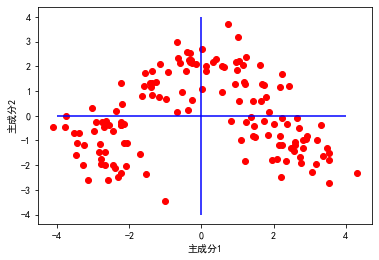

In [26]:
plt.rcParams['font.sans-serif']=['SimHei']#显示中文标签 
plt.rcParams['axes.unicode_minus']=False

plt.scatter(pc[:,0],pc[:,1],color='r')
plt.hlines(y=0,xmax=4,xmin=-4,color='b')
plt.vlines(x=0,ymax=4,ymin=-4,color='b')
plt.xlabel('主成分1')
plt.ylabel('主成分2')
plt.show()

### 线性判别分析(LDA）

In [9]:
lda = LDA(n_components=2)
lr = LogisticRegression()
x_train_lda = lda.fit_transform(x_train_std, y_train)  # LDA是有监督方法，需要用到标签
x_test_lda = lda.fit_transform(x_test_std, y_test)  # 预测时候特征向量正负问题，乘-1反转镜像
lr.fit(x_train_lda, y_train)

LogisticRegression()

In [11]:
def plot_decision_regions(x, y, classifier, resolution=0.02):
    markers = ['s', 'x', 'o', '^', 'v']
    colors = ['r', 'g', 'b', 'gray', 'cyan']
    cmap = ListedColormap(colors[:len(np.unique(y))])
    x1_min, x1_max = x[:, 0].min() - 1, x[:, 0].max() + 1
    x2_min, x2_max = x[:, 1].min() - 1, x[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution), np.arange(x2_min, x2_max, resolution))
    z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    z = z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, z, alpha=0.4, cmap=cmap)
 
    for idx, cc in enumerate(np.unique(y)):
        plt.scatter(x=x[y == cc, 0],
                    y=x[y == cc, 1],
                    alpha=0.6,
                    c=cmap(idx),
                    edgecolor='black',
                    marker=markers[idx],
                    label=cc) 

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


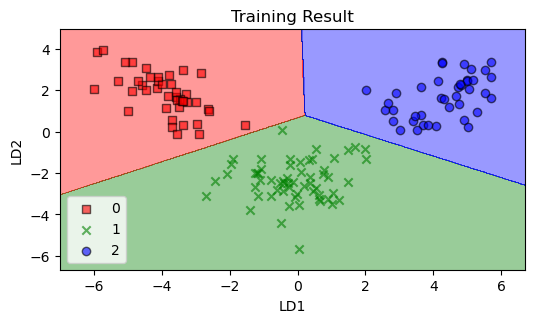

In [12]:
plt.figure(figsize=(6, 7), dpi=100)  # 画图高宽，像素
plt.subplot(2, 1, 1)
plot_decision_regions(x_train_lda, y_train, classifier=lr)
plt.title('Training Result')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.show()

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.
'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


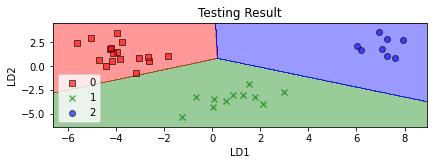

In [13]:
plt.subplot(2, 1, 2)
plot_decision_regions(x_test_lda, y_test, classifier=lr)
plt.title('Testing Result')
plt.xlabel('LD1')
plt.ylabel('LD2')
plt.legend(loc='lower left')
plt.tight_layout()  # 子图间距
plt.show()